In [1]:
# Documentation:
# In the County Classification and Income sheet, the row "73 02063 AK Chugach" is incorrect, with an additional space before "Chugach"

In [2]:
import pandas as pd

dataPeople = pd.data = pd.read_excel('RuralAtlasData24.xlsx', sheet_name='People')

In [3]:
# education_columns = [
    'Ed1LessThanHSNum',
    'Ed1LessThanHSPct',
    'Ed2HSDiplomaOnlyNum',
    'Ed2HSDiplomaOnlyPct',
    'Ed3SomeCollegeNum',
    'Ed3SomeCollegePct',
    'Ed4AssocDegreeNum',
    'Ed4AssocDegreePct',
    'Ed5CollegePlusNum',
    'Ed5CollegePlusPct'
]

population_columns = [
    'POPESTIMATE2021',
    'POPESTIMATE2020',
    'TotalPopEst2019',
    'TotalPopEst2018',
    'TotalPopEst2017',
    'TotalPopACS' # Five-year average 2017-21
]

migration_columns = [
    'Net_InterMigration_2020_2021',
    'Net_InterMigrationRate_2020_2021',
    'Net_International_Migration_2010_2019',
    'Net_International_Migration_Rate_2010_2019',
    'Net_Migration_2020_2021',
    'Net_Migration_Rate_2020_2021',
    'NetMigration1019',
    'NetMigrationRate1019'
]


dataPeople['FIPS'] = dataPeople['FIPS'].astype(str).str.zfill(5)
complete_education_data = dataPeople[['FIPS', 'State', 'County'] + migration_columns + population_columns + education_columns]

In [4]:
# prevents leading zeros from being removed on FIPS code
county_education_data = complete_education_data[~complete_education_data['FIPS'].str.endswith("000")] 

# resets key index back to start from 0
county_education_data = county_education_data.reset_index(drop=True) 

In [5]:
# Urban-rural classification: Metro2013
dataCountyClassifications = pd.data = pd.read_excel('RuralAtlasData24.xlsx', sheet_name='County Classifications')

rural_urban_columns = [
    'Metro2013'
]

dataCountyClassifications['FIPStxt'] = dataCountyClassifications['FIPStxt'].astype(str).str.zfill(5)
county_classification_data = dataCountyClassifications[['FIPStxt', 'State', 'County'] + rural_urban_columns]

# Jobs
dataJobs = pd.data = pd.read_excel('RuralAtlasData24.xlsx', sheet_name='Jobs')
dataJobs['FIPS'] = dataJobs['FIPS'].astype(str).str.zfill(5)
dataJobs = dataJobs[~dataJobs['FIPS'].str.endswith("000")]
dataJobs = dataJobs.reset_index(drop=True) 

# Income
dataIncome = pd.data = pd.read_excel('RuralAtlasData24.xlsx', sheet_name='Income')
dataIncome['FIPS'] = dataIncome['FIPS'].astype(str).str.zfill(5)
dataIncome = dataIncome[~dataIncome['FIPS'].str.endswith("000")]
dataIncome = dataIncome.reset_index(drop=True) 

In [9]:
# merging datasets

merged_dataset_1 = pd.merge(county_education_data, county_classification_data, how='inner', left_on=['FIPS', 'State', 'County'], right_on=['FIPStxt', 'State', 'County'])
merged_dataset_1 = merged_dataset_1.drop(columns=['FIPStxt'])

merged_dataset_2 = pd.merge(dataJobs, dataIncome, how='inner', left_on=['FIPS', 'State', 'County'], right_on=['FIPS', 'State', 'County'])

final_dataset = pd.merge(merged_dataset_1, merged_dataset_2, how='inner', left_on=['FIPS', 'State', 'County'], right_on=['FIPS', 'State', 'County'])

print(final_dataset.head(5))

    FIPS State   County  Net_InterMigration_2020_2021  \
0  01001    AL  Autauga                           5.0   
1  01003    AL  Baldwin                          63.0   
2  01005    AL  Barbour                           1.0   
3  01007    AL     Bibb                           2.0   
4  01009    AL   Blount                           2.0   

   Net_InterMigrationRate_2020_2021  Net_International_Migration_2010_2019  \
0                          0.008492                                  -16.0   
1                          0.027022                                 1307.0   
2                          0.003971                                   44.0   
3                          0.009000                                  120.0   
4                          0.003385                                  119.0   

   Net_International_Migration_Rate_2010_2019  Net_Migration_2020_2021  \
0                                      -0.029                    250.0   
1                                       

In [10]:
variables_to_sum = [
    'Ed1LessThanHSNum',
    'Ed2HSDiplomaOnlyNum',
    'Ed3SomeCollegeNum',
    'Ed4AssocDegreeNum',
    'Ed5CollegePlusNum',
    'NumCivEmployed',
    'NumCivLaborForce2008',
    'NumUnemployed2012',
    'NumEmployed2012',
    'NumCivLaborForce2012',
    'NumCivLaborforce2013',
    'NumCivLaborforce2014',
    'NumCivLaborforce2015',
    'NumCivLaborforce2016',
    'NumCivLaborforce2017',
    'NumCivLaborforce2018',
    'NumCivLaborforce2019',
    'NumCivLaborForce2020',
    'NumCivLaborforce2021',
    'NumEmployed2007',
    'NumEmployed2008',
    'NumEmployed2009',
    'NumEmployed2010',
    'NumEmployed2011',
    'NumEmployed2014',
    'NumEmployed2018',
    'NumEmployed2017',
    'NumEmployed2016',
    'NumEmployed2015',
    'NumEmployed2013',
    'NumEmployed2020',
    'NumEmployed2021',
    'NumUnemployed2007',
    'NumUnemployed2008',
    'NumUnemployed2009',
    'NumUnemployed2010',
    'NumUnemployed2011',
    'NumUnemployed2012',
    'NumUnemployed2013',
    'NumUnemployed2014',
    'NumUnemployed2015',
    'NumUnemployed2016',
    'NumUnemployed2017',
    'NumUnemployed2018',
    'NumUnemployed2019',
    'NumUnemployed2020',
    'NumUnemployed2021',
    'NumAll_inPOV_ACS',
    'POVALL',
    'Num_inPOV_0_17_ACS',
    'Metro2013',
    'Net_InterMigration_2020_2021',
    'Net_International_Migration_2010_2019',
    'Net_Migration_2020_2021',
    'NetMigration1019',
    'POPESTIMATE2021',
    'POPESTIMATE2020',
    'TotalPopEst2019',
    'TotalPopEst2018',
    'TotalPopEst2017',
    'TotalPopACS'
]

variables_to_weight = [
    'Ed1LessThanHSPct',
    'Ed2HSDiplomaOnlyPct',
    'Ed3SomeCollegePct',
    'Ed4AssocDegreePct',
    'Ed5CollegePlusPct',
    'Metro2013',
    'UnempRate2021',
    'UnempRate2020',
    'UnempRate2019',
    'UnempRate2018',
    'UnempRate2017',
    'UnempRate2016',
    'UnempRate2015',
    'UnempRate2010',
    'UnempRate2007',
    'PctEmpChange1021',
    'PctEmpChange0721',
    'PctEmpChange0710',
    'PctEmpAgriculture',
    'PctEmpMining',
    'PctEmpConstruction',
    'PctEmpManufacturing',
    'PctEmpTrade',
    'PctEmpTrans',
    'PctEmpInformation',
    'PctEmpFIRE',
    'PctEmpServices',
    'PctEmpGovt',
    'UnempRate2012',
    'UnempRate2009',
    'UnempRate2011',
    'UnempRate2013',
    'UnempRate2014',
    'Median_HH_Inc_ACS',
    'PerCapitaInc',
    'Poverty_Rate_0_17_ACS',
    'Poverty_Rate_ACS',
    'Deep_Pov_All',
    'Deep_Pov_Children',
    'PCTPOV017',
    'Net_InterMigrationRate_2020_2021',
    'Net_International_Migration_Rate_2010_2019',
    'Net_Migration_Rate_2020_2021',
    'NetMigrationRate1019',
    'POPESTIMATE2021', # population isn't weighted but is required to calculate the weights
    'POPESTIMATE2020',
    'TotalPopEst2019',
    'TotalPopEst2018',
    'TotalPopEst2017',
    'TotalPopACS'
]

aggregate_dataset = final_dataset[variables_to_sum]
weighted_dataset = final_dataset[variables_to_weight]

In [11]:
# Loop through each population count to calculate weighted data

population_variables = ['POPESTIMATE2021', 'POPESTIMATE2020', 'TotalPopEst2019', 'TotalPopEst2018', 'TotalPopEst2017', 'TotalPopACS']

for variable in population_variables:
    aggregate_grouped = final_dataset.groupby('Metro2013')[variable].sum().reset_index()

    total_rural_population = aggregate_grouped.at[0, variable]
    total_urban_population = aggregate_grouped.at[1, variable]
    weighted_rural = weighted_dataset[weighted_dataset['Metro2013'] == 0].reset_index(drop=True)
    weighted_urban = weighted_dataset[weighted_dataset['Metro2013'] == 1].reset_index(drop=True)

    final_weighted_rural = weighted_rural.copy()
    final_weighted_rural = final_weighted_rural.fillna(0)

    for column in final_weighted_rural.columns:
        final_weighted_rural[column] = (weighted_rural[column] * final_weighted_rural[variable]) / total_rural_population

    rural_weighted_sum_final = final_weighted_rural.sum(axis=0)
    rural_weighted_sum_final = pd.DataFrame(rural_weighted_sum_final).reset_index()

    final_weighted_urban = weighted_urban.copy()
    final_weighted_urban = final_weighted_urban.fillna(0)

    for column in final_weighted_urban.columns:
        for index in final_weighted_urban.index:
            final_weighted_urban.at[index, column] = (final_weighted_urban.at[index, column] * final_weighted_urban.at[index, variable]) / total_urban_population

    urban_weighted_sum_final = final_weighted_urban.sum(axis=0)
    urban_weighted_sum_final = pd.DataFrame(urban_weighted_sum_final).reset_index()

    # this outputs many excel files
    rural_weighted_sum_final.to_excel(f'final_dataset_rural_{variable}.xlsx', sheet_name='RuralWeighted', index=False)
    urban_weighted_sum_final.to_excel(f'final_dataset_urban_{variable}.xlsx', sheet_name='UrbanWeighted', index=False)
    

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# convert .shp file to output.geojson data

shapefile_path = "cb_2022_us_county_500k.shp"
gdf = gpd.read_file(shapefile_path)

geojson_data = gdf.to_crs(epsg='4326').to_json()

with open("output.geojson", "w") as geojson_file:
    geojson_file.write(geojson_data)


In [21]:
gdf = gpd.read_file("output.geojson")

In [23]:
# Migration data
migration_data = county_education_data[['FIPS', 'State', 'County', 'NetMigration1019', 'NetMigrationRate1019']].copy()
migration_data = migration_data.dropna()

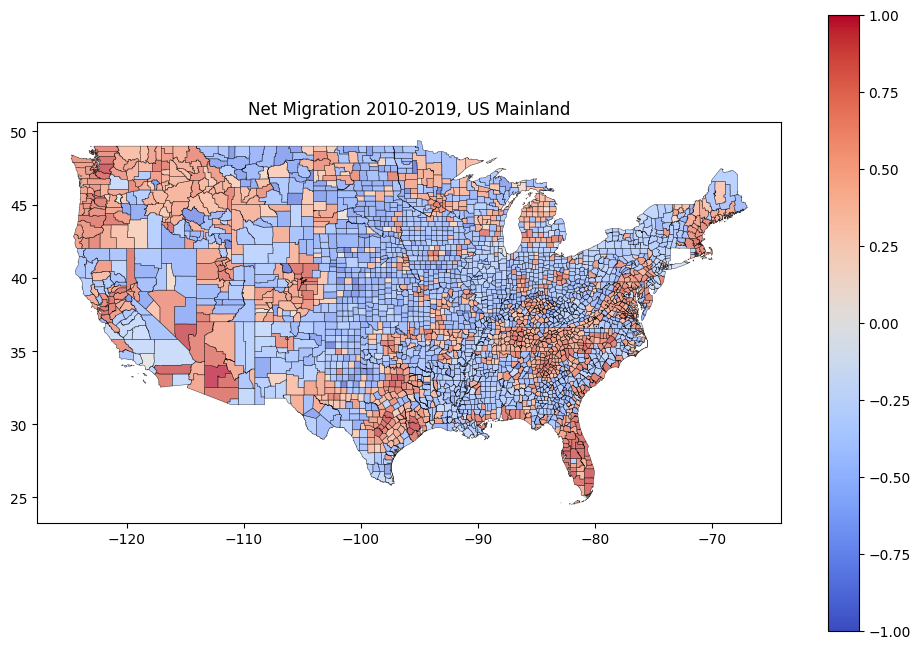

In [35]:
# Merge the datasets based on the FIPS code
gdf['FIPS'] = gdf['STATEFP'] + gdf['COUNTYFP']
merged_data = pd.merge(gdf, migration_data, left_on='FIPS', right_on='FIPS')

# Filter data for US continent (excluding Alaska and Hawaii)
us_mainland = merged_data[~merged_data["STATEFP"].isin(["02", "15", "72"])]

# Separate positive and negative NetMigration values
positive_migration_data = us_mainland[us_mainland['NetMigration1019'] > 0].copy()
negative_migration_data = us_mainland[us_mainland['NetMigration1019'] < 0].copy()

# Apply logistic function for normalization to positive subset
logistic_function_positive = lambda x: np.log10(x)
positive_migration_data['Normalized_NetMigration'] = logistic_function_positive(positive_migration_data['NetMigration1019'])

# Min-Max normalization to scale values between 0 and 1
min_val_positive = positive_migration_data['Normalized_NetMigration'].min()
max_val_positive = positive_migration_data['Normalized_NetMigration'].max()
positive_migration_data['Normalized_NetMigration'] = (positive_migration_data['Normalized_NetMigration'] - min_val_positive) / (max_val_positive - min_val_positive)

# Apply logistic function for normalization to absolute value of negative subset, then reverse sign
logistic_function_negative = lambda x: np.log10(np.abs(x)) * -1
negative_migration_data['Normalized_NetMigration'] = logistic_function_negative(negative_migration_data['NetMigration1019'])

# Min-Max normalization to scale values between 0 and -1
min_val_negative = negative_migration_data['Normalized_NetMigration'].min()
max_val_negative = negative_migration_data['Normalized_NetMigration'].max()
negative_migration_data['Normalized_NetMigration'] = (negative_migration_data['Normalized_NetMigration'] - min_val_negative) / (max_val_negative - min_val_negative) * -1

# Concatenate the positive and negative subsets back together
normalized_migration_data = pd.concat([positive_migration_data, negative_migration_data])

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))
normalized_migration_data.plot(ax=ax, edgecolor='black', linewidth=0.35, alpha=0.7, column='Normalized_NetMigration', cmap='coolwarm', legend=True)
plt.title("Net Migration 2010-2019, US Mainland")
plt.show()

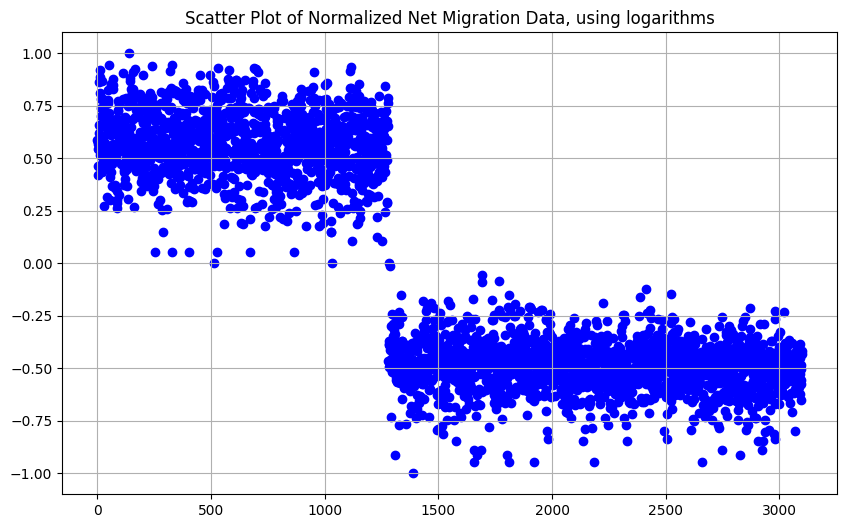

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(normalized_migration_data)), normalized_migration_data['Normalized_NetMigration'], color='blue')
plt.title('Scatter Plot of Normalized Net Migration Data, using logarithms')
plt.grid(True)
plt.show()

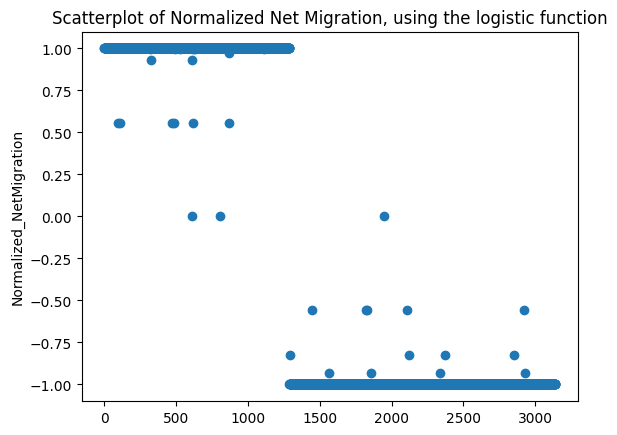

In [40]:
positive_migration_data = migration_data[migration_data['NetMigration1019'] > 0].copy()
negative_migration_data = migration_data[migration_data['NetMigration1019'] < 0].copy()

# Using logistic function
logistic_function = lambda x: 1 / (1 + np.exp(-x))

positive_migration_data['Normalized_NetMigration'] = logistic_function(positive_migration_data['NetMigration1019'])

min_val_positive = positive_migration_data['Normalized_NetMigration'].min()
max_val_positive = positive_migration_data['Normalized_NetMigration'].max()
positive_migration_data['Normalized_NetMigration'] = (positive_migration_data['Normalized_NetMigration'] - min_val_positive) / (max_val_positive - min_val_positive)

negative_migration_data['Normalized_NetMigration'] = logistic_function(np.abs(negative_migration_data['NetMigration1019']))

min_val_negative = negative_migration_data['Normalized_NetMigration'].min()
max_val_negative = negative_migration_data['Normalized_NetMigration'].max()
negative_migration_data['Normalized_NetMigration'] = (negative_migration_data['Normalized_NetMigration'] - min_val_negative) / (max_val_negative - min_val_negative) * -1

normalized_migration_data = pd.concat([positive_migration_data, negative_migration_data])

plt.scatter(range(len(normalized_migration_data)), normalized_migration_data['Normalized_NetMigration'])
plt.ylabel('Normalized_NetMigration')
plt.title('Scatterplot of Normalized Net Migration, using the logistic function')
plt.show()

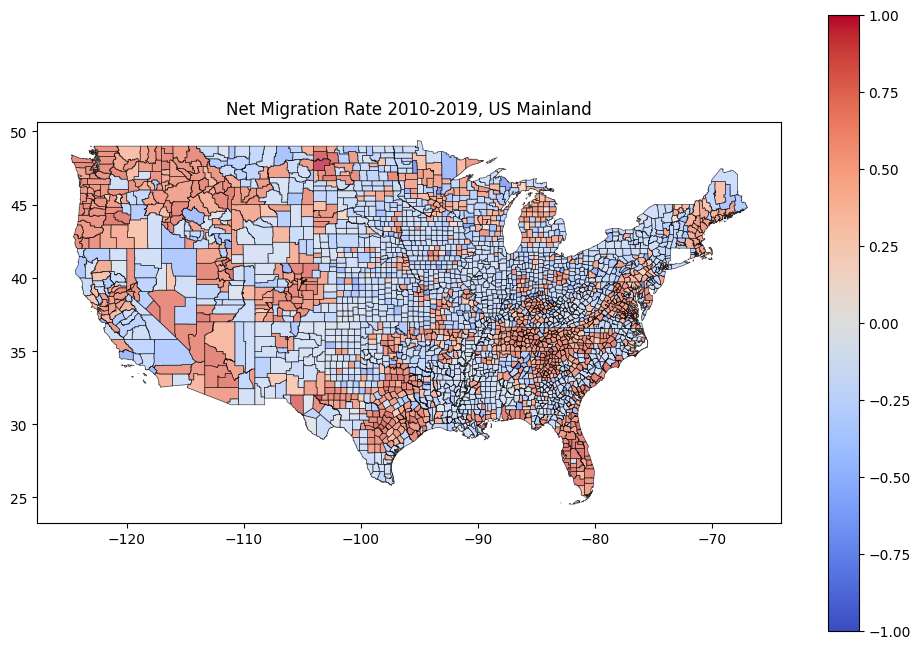

In [27]:
# US mainland, net migration rate

gdf['FIPS'] = gdf['STATEFP'] + gdf['COUNTYFP']
merged_data = pd.merge(gdf, migration_data, left_on='FIPS', right_on='FIPS')

us_mainland = merged_data[~merged_data["STATEFP"].isin(["02", "15", "72"])]

positive_migration_data = us_mainland[us_mainland['NetMigrationRate1019'] > 0].copy()
negative_migration_data = us_mainland[us_mainland['NetMigrationRate1019'] < 0].copy()

logistic_function_positive = lambda x: np.log10(x)
positive_migration_data['Normalized_NetMigrationRate'] = logistic_function_positive(positive_migration_data['NetMigrationRate1019'])

min_val_positive = positive_migration_data['Normalized_NetMigrationRate'].min()
max_val_positive = positive_migration_data['Normalized_NetMigrationRate'].max()
positive_migration_data['Normalized_NetMigrationRate'] = (positive_migration_data['Normalized_NetMigrationRate'] - min_val_positive) / (max_val_positive - min_val_positive)

logistic_function_negative = lambda x: np.log10(np.abs(x)) * -1
negative_migration_data['Normalized_NetMigrationRate'] = logistic_function_negative(negative_migration_data['NetMigrationRate1019'])

min_val_negative = negative_migration_data['Normalized_NetMigrationRate'].min()
max_val_negative = negative_migration_data['Normalized_NetMigrationRate'].max()
negative_migration_data['Normalized_NetMigrationRate'] = (negative_migration_data['Normalized_NetMigrationRate'] - min_val_negative) / (max_val_negative - min_val_negative) * -1

normalized_migration_data = pd.concat([positive_migration_data, negative_migration_data])

fig, ax = plt.subplots(figsize=(12, 8))
normalized_migration_data.plot(ax=ax, edgecolor='black', linewidth=0.5, alpha=0.7, column='Normalized_NetMigrationRate', cmap='coolwarm', legend=True)
plt.title("Net Migration Rate 2010-2019, US Mainland")
plt.show()

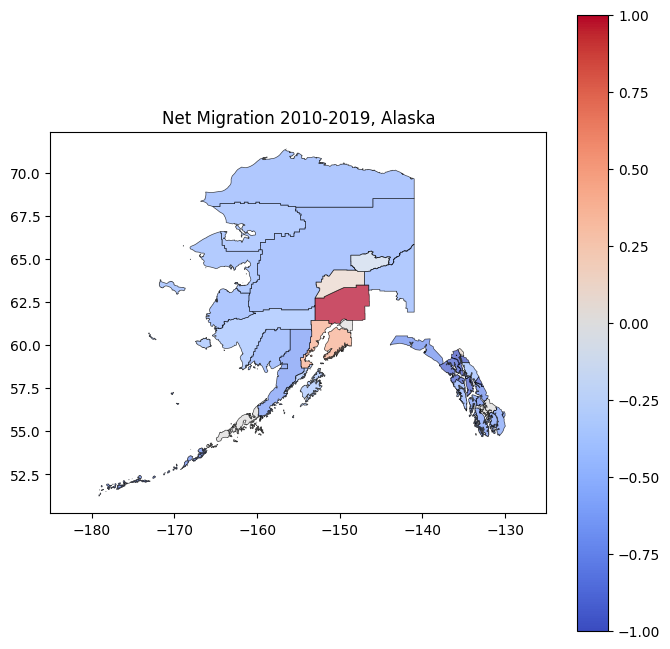

In [28]:
# Alaska Only, net migration

gdf['FIPS'] = gdf['STATEFP'] + gdf['COUNTYFP']
merged_data = pd.merge(gdf, migration_data, left_on='FIPS', right_on='FIPS')

us_mainland = merged_data[merged_data["STATEFP"].isin(["02"])]

positive_migration_data = us_mainland[us_mainland['NetMigration1019'] > 0].copy()
negative_migration_data = us_mainland[us_mainland['NetMigration1019'] < 0].copy()

logistic_function_positive = lambda x: np.log10(x)
positive_migration_data['Normalized_NetMigration'] = logistic_function_positive(positive_migration_data['NetMigration1019'])

min_val_positive = positive_migration_data['Normalized_NetMigration'].min()
max_val_positive = positive_migration_data['Normalized_NetMigration'].max()
positive_migration_data['Normalized_NetMigration'] = (positive_migration_data['Normalized_NetMigration'] - min_val_positive) / (max_val_positive - min_val_positive)

logistic_function_negative = lambda x: np.log10(np.abs(x)) * -1
negative_migration_data['Normalized_NetMigration'] = logistic_function_negative(negative_migration_data['NetMigration1019'])

min_val_negative = negative_migration_data['Normalized_NetMigration'].min()
max_val_negative = negative_migration_data['Normalized_NetMigration'].max()
negative_migration_data['Normalized_NetMigration'] = (negative_migration_data['Normalized_NetMigration'] - min_val_negative) / (max_val_negative - min_val_negative) * -1

normalized_migration_data = pd.concat([positive_migration_data, negative_migration_data])

fig, ax = plt.subplots(figsize=(8, 8))
normalized_migration_data.plot(ax=ax, edgecolor='black', linewidth=0.5, alpha=0.7, column='Normalized_NetMigration', cmap='coolwarm', legend=True)
ax.set_xlim([-185, -125])
plt.title("Net Migration 2010-2019, Alaska")
plt.show()

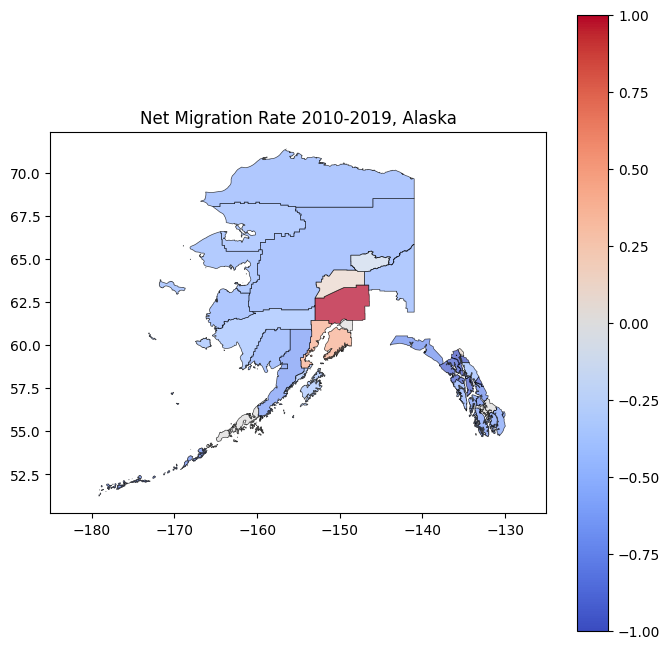

In [29]:
# Alaska only, Net Migration Rate

gdf['FIPS'] = gdf['STATEFP'] + gdf['COUNTYFP']
merged_data = pd.merge(gdf, migration_data, left_on='FIPS', right_on='FIPS')

# Alaska only
us_mainland = merged_data[merged_data["STATEFP"].isin(["02"])]

positive_migration_data = us_mainland[us_mainland['NetMigration1019'] > 0].copy()
negative_migration_data = us_mainland[us_mainland['NetMigration1019'] < 0].copy()

logistic_function_positive = lambda x: np.log10(x)
positive_migration_data['Normalized_NetMigration'] = logistic_function_positive(positive_migration_data['NetMigration1019'])

min_val_positive = positive_migration_data['Normalized_NetMigration'].min()
max_val_positive = positive_migration_data['Normalized_NetMigration'].max()
positive_migration_data['Normalized_NetMigration'] = (positive_migration_data['Normalized_NetMigration'] - min_val_positive) / (max_val_positive - min_val_positive)

logistic_function_negative = lambda x: np.log10(np.abs(x)) * -1
negative_migration_data['Normalized_NetMigration'] = logistic_function_negative(negative_migration_data['NetMigration1019'])

min_val_negative = negative_migration_data['Normalized_NetMigration'].min()
max_val_negative = negative_migration_data['Normalized_NetMigration'].max()
negative_migration_data['Normalized_NetMigration'] = (negative_migration_data['Normalized_NetMigration'] - min_val_negative) / (max_val_negative - min_val_negative) * -1

normalized_migration_data = pd.concat([positive_migration_data, negative_migration_data])

fig, ax = plt.subplots(figsize=(8, 8))
normalized_migration_data.plot(ax=ax, edgecolor='black', linewidth=0.5, alpha=0.7, column='Normalized_NetMigration', cmap='coolwarm', legend=True)
ax.set_xlim([-185, -125])
plt.title("Net Migration Rate 2010-2019, Alaska")
plt.show()

In [30]:
# Education data, no negative values

education_columns = [
    'Ed1LessThanHSNum',
    'Ed1LessThanHSPct',
    'Ed2HSDiplomaOnlyNum',
    'Ed2HSDiplomaOnlyPct',
    'Ed3SomeCollegeNum',
    'Ed3SomeCollegePct',
    'Ed4AssocDegreeNum',
    'Ed4AssocDegreePct',
    'Ed5CollegePlusNum',
    'Ed5CollegePlusPct'
]

education_data = county_education_data[['FIPS', 'State', 'County'] + education_columns].copy()
education_data = education_data.dropna()


# Combine the five levels into two levels: Some College and Above (3-5) or below (1-2) 
education_data['SomeCollegeOrHigherPct'] = (
    education_data['Ed3SomeCollegePct'] +
    education_data['Ed4AssocDegreePct'] +
    education_data['Ed5CollegePlusPct']
)

education_data['LessThanSomeCollegePct'] = (
    education_data['Ed1LessThanHSPct'] +
    education_data['Ed2HSDiplomaOnlyPct']
)

education_data = education_data.drop(education_columns, axis=1)


In [31]:
# standardize from 0 to 1
education_data['SomeCollegeOrHigherProp'] = (
    education_data['SomeCollegeOrHigherPct'] / 100.0
)

education_data['LessThanSomeCollegeProp'] = (
    education_data['LessThanSomeCollegePct'] / 100.0
)

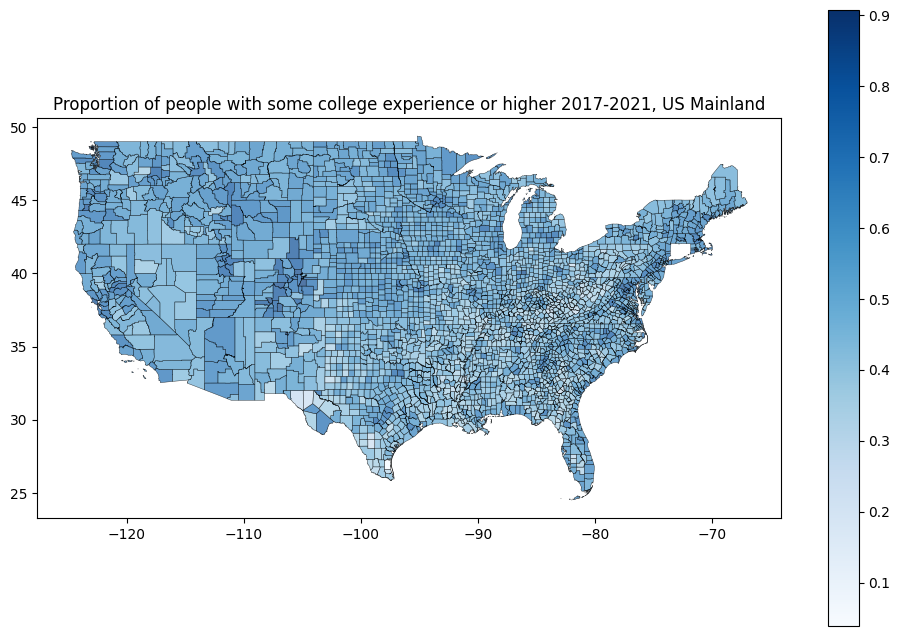

In [32]:
# US mainland, education

gdf['FIPS'] = gdf['STATEFP'] + gdf['COUNTYFP']
merged_data = pd.merge(gdf, education_data, left_on='FIPS', right_on='FIPS')

us_mainland = merged_data[~merged_data["STATEFP"].isin(["02", "15", "72"])]

fig, ax = plt.subplots(figsize=(12, 8))
us_mainland.plot(ax=ax, edgecolor='black', linewidth=0.35, alpha=0.7, column='SomeCollegeOrHigherProp', cmap='Blues', legend=True)
plt.title("Proportion of people with some college experience or higher 2017-2021, US Mainland")
plt.show()

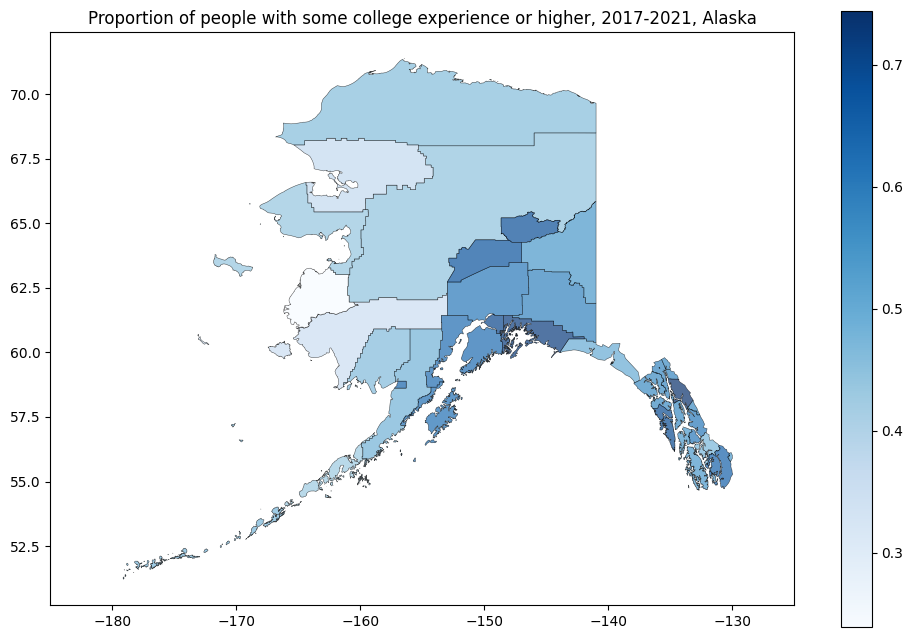

In [33]:
# Alaska, education

gdf['FIPS'] = gdf['STATEFP'] + gdf['COUNTYFP']
merged_data = pd.merge(gdf, education_data, left_on='FIPS', right_on='FIPS')

us_mainland = merged_data[merged_data["STATEFP"].isin(["02"])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim([-185, -125])
us_mainland.plot(ax=ax, edgecolor='black', linewidth=0.35, alpha=0.7, column='SomeCollegeOrHigherProp', cmap='Blues', legend=True)
plt.title("Proportion of people with some college experience or higher, 2017-2021, Alaska")
plt.show()
